In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/kaggle/input/d/lainguyn123/student-performance-factors/StudentPerformanceFactors.csv"
data = pd.read_csv(file_path)

# Show first rows
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [2]:
from sklearn.model_selection import train_test_split
# Split dataset (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Train shape: (5285, 20)
Test shape: (1322, 20)


In [3]:
# Basic dataset info (Train only)
print("Train shape:", train_data.shape) 
print("\nColumn names:", train_data.columns.tolist()) 
print("\nData types and null values:") 
print(train_data.info()) 

Train shape: (5285, 20)

Column names: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']

Data types and null values:
<class 'pandas.core.frame.DataFrame'>
Index: 5285 entries, 5810 to 860
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               5285 non-null   int64 
 1   Attendance                  5285 non-null   int64 
 2   Parental_Involvement        5285 non-null   object
 3   Access_to_Resources         5285 non-null   object
 4   Extracurricular_Activities  5285 non-null   object
 5   Sleep_Hours                 5285 non-nu

In [4]:
# Summary statistics
print("\nSummary statistics:")
train_data.describe()


Summary statistics:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000
mean,19.967077,79.873605,7.024409,75.061116,1.499527,2.968590,67.215137
std,5.993282,11.519161,1.458215,14.406537,1.233464,1.033942,3.922228
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,56.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,43.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [5]:
train_data.duplicated().sum()

0

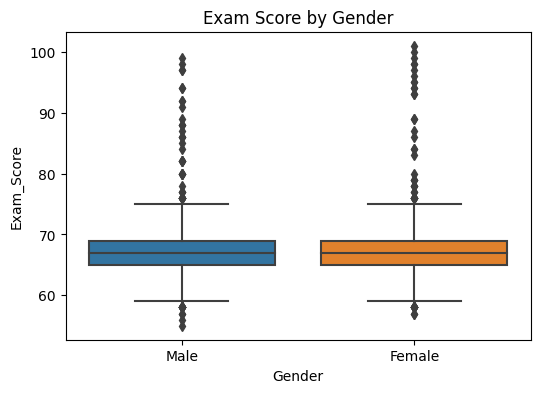

In [6]:

# Compare Exam Score across different Genders (if available)
if "Gender" in data.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Gender", y="Exam_Score", data=data)
    plt.title("Exam Score by Gender")
    plt.show()


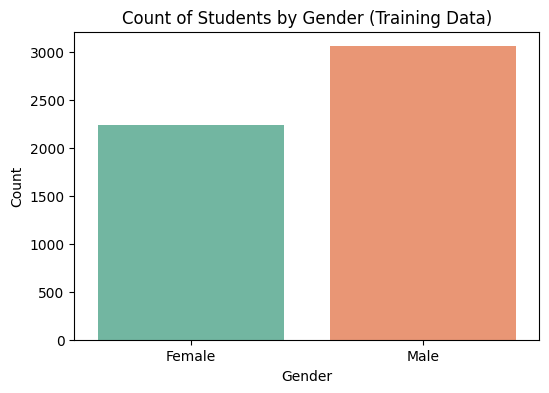

In [7]:
# Column chart for Gender attribute
if "Gender" in train_data.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Gender", data=train_data, palette="Set2")
    plt.title("Count of Students by Gender (Training Data)")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()
else:
    print("Gender column not found in dataset")


In [8]:
# Check for missing values 
print("\nMissing values per column:") 
print(train_data.isnull().sum()) 


Missing values per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               60
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      69
Distance_from_Home            51
Gender                         0
Exam_Score                     0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


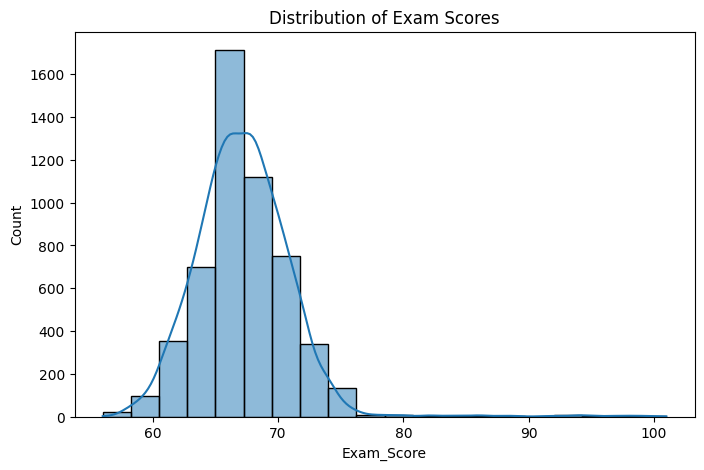

In [9]:
# Visualize distribution of target variable (Final Exam Score)
plt.figure(figsize=(8,5))
sns.histplot(train_data['Exam_Score'], bins=20, kde=True)
plt.title("Distribution of Exam Scores")
plt.show()


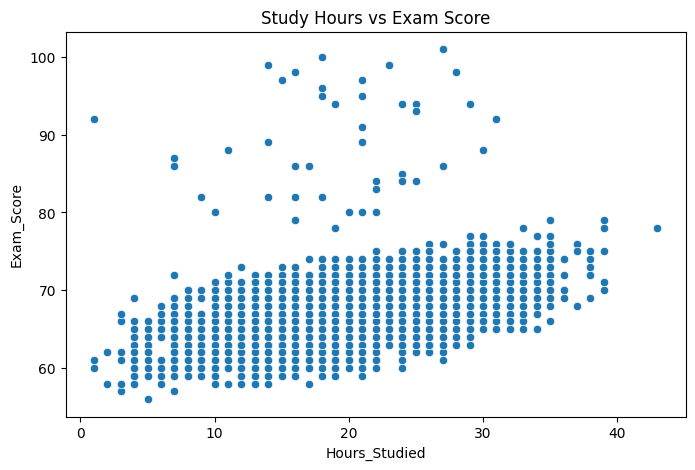

In [10]:

# Relationship between Study Hours and Exam Score
plt.figure(figsize=(8,5))
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=train_data)
plt.title("Study Hours vs Exam Score")
plt.show()

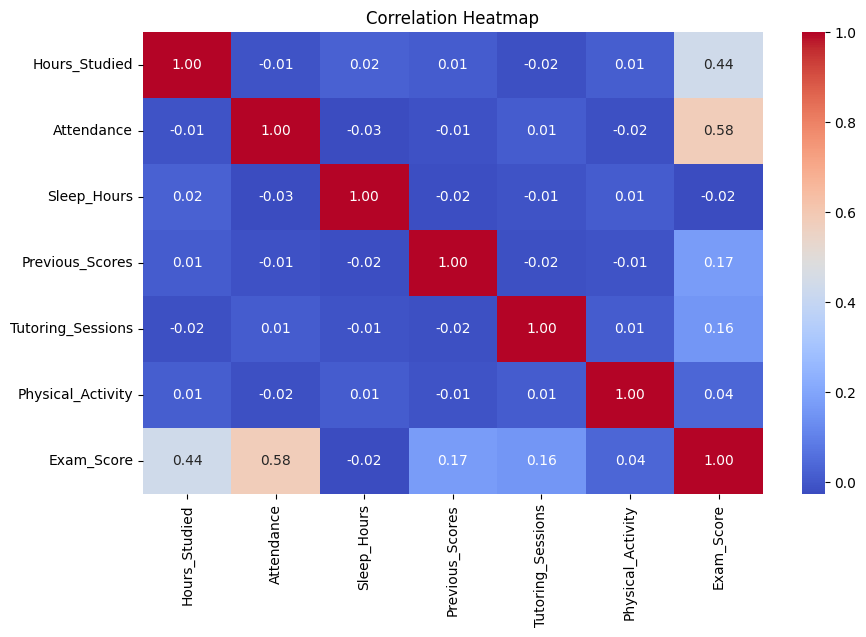

In [11]:

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


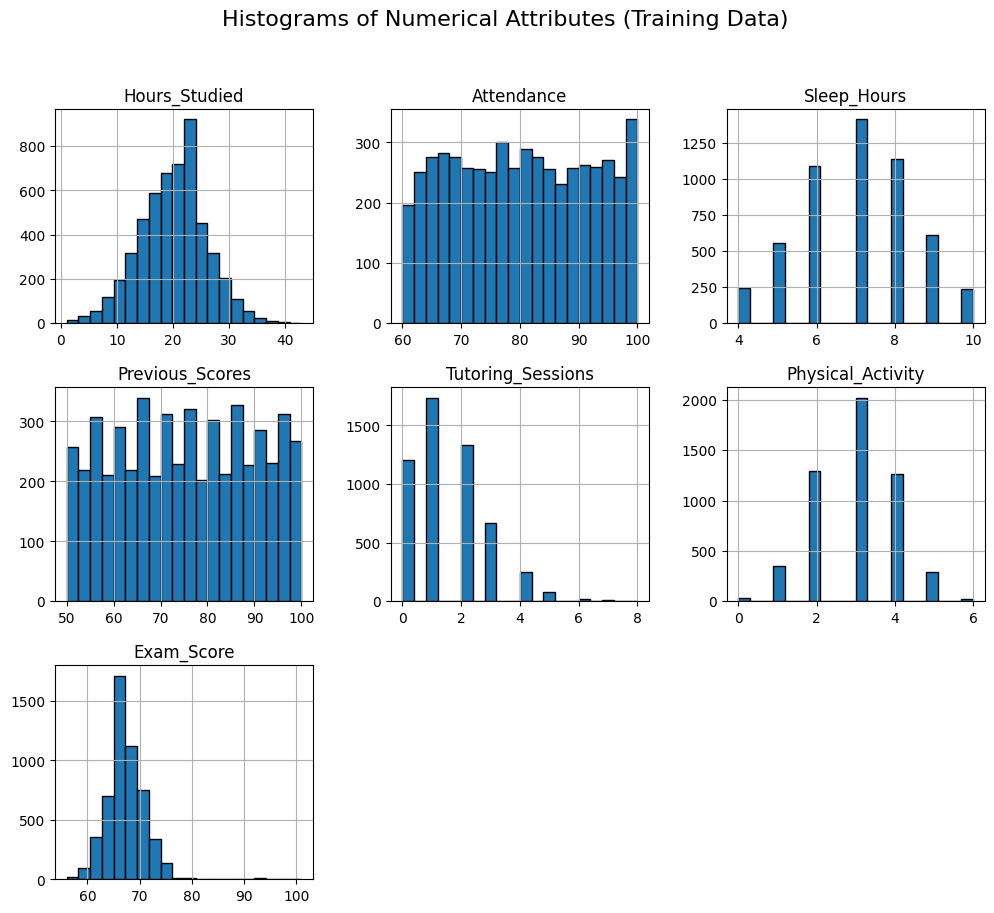

In [12]:
# Histograms for all numerical attributes
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

train_data[num_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Attributes (Training Data)", fontsize=16)
plt.show()


In [13]:
# Loop over categorical columns and show value counts
cat_cols = train_data.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(train_data[col].value_counts())
    print("-" * 30)



--- Parental_Involvement ---
Parental_Involvement
Medium    2690
High      1524
Low       1071
Name: count, dtype: int64
------------------------------

--- Access_to_Resources ---
Access_to_Resources
Medium    2663
High      1570
Low       1052
Name: count, dtype: int64
------------------------------

--- Extracurricular_Activities ---
Extracurricular_Activities
Yes    3163
No     2122
Name: count, dtype: int64
------------------------------

--- Motivation_Level ---
Motivation_Level
Medium    2688
Low       1558
High      1039
Name: count, dtype: int64
------------------------------

--- Internet_Access ---
Internet_Access
Yes    4873
No      412
Name: count, dtype: int64
------------------------------

--- Family_Income ---
Family_Income
Low       2146
Medium    2128
High      1011
Name: count, dtype: int64
------------------------------

--- Teacher_Quality ---
Teacher_Quality
Medium    3141
High      1567
Low        517
Name: count, dtype: int64
------------------------------

--

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# -------------------------------
# Define columns
# -------------------------------
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = train_data.select_dtypes(include=['object']).columns.tolist()

# -------------------------------
# Pipelines
# -------------------------------
# For numerical: replace null with median + scaling
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# For categorical: replace null with mode + one-hot encoding
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# -------------------------------
# Column Transformer
# -------------------------------
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# -------------------------------
# Apply Transformation
# -------------------------------
X_processed = preprocessor.fit_transform(train_data)

print("Shape before preprocessing:", train_data.shape)
print("Shape after preprocessing:", X_processed.shape)


Shape before preprocessing: (5285, 20)
Shape after preprocessing: (5285, 41)


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# Features (X) and Target (y)
# -------------------------------
X = train_data.drop(columns=["Exam_Score"])
y = train_data["Exam_Score"]

# -------------------------------
# Column types
# -------------------------------
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# -------------------------------
# Pipelines
# -------------------------------
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Preprocessor
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# -------------------------------
# Final pipeline with Linear Regression
# -------------------------------
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# -------------------------------
# Train / Test split (from training data itself)
# -------------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_val)

# -------------------------------
# Evaluation
# -------------------------------
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("Linear Regression Performance:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


Linear Regression Performance:
MAE:  0.51
RMSE: 2.05
R²:   0.71


In [16]:
from sklearn.preprocessing import PolynomialFeatures
import joblib
# -------------------------------
# Try Polynomial Regression with different degrees
# -------------------------------
best_models = {}

for degree in [1, 2, 3]:
    print(f"\n---- Polynomial Degree {degree} ----")
    
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("regressor", LinearRegression())
    ])
    
    # Train
    model_pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = model_pipeline.predict(X_val)
    
    # Evaluate
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)

    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.2f}")
    
    # Save the model
    filename = f"best_model_degree_{degree}.pkl"
    joblib.dump(model_pipeline, filename)
    best_models[degree] = (model_pipeline, mae, rmse, r2, filename)

print("\n✅ Models saved for each degree:")
for degree, (model, mae, rmse, r2, filename) in best_models.items():
    print(f"Degree {degree}: Saved as {filename}, R²={r2:.2f}")


---- Polynomial Degree 1 ----
MAE:  0.51
RMSE: 2.05
R²:   0.71

---- Polynomial Degree 2 ----
MAE:  0.79
RMSE: 2.19
R²:   0.67

---- Polynomial Degree 3 ----
MAE:  57443851.93
RMSE: 270422655.29
R²:   -5066642845047790.00

✅ Models saved for each degree:
Degree 1: Saved as best_model_degree_1.pkl, R²=0.71
Degree 2: Saved as best_model_degree_2.pkl, R²=0.67
Degree 3: Saved as best_model_degree_3.pkl, R²=-5066642845047790.00


In [17]:
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# -------------------------------
# Load the saved model (degree 1)
# -------------------------------
best_model = joblib.load("best_model_degree_1.pkl")

# -------------------------------
# Prepare Test Data
# -------------------------------
X_test = test_data.drop(columns=["Exam_Score"])
y_test = test_data["Exam_Score"]

# -------------------------------
# Predict on Test Data
# -------------------------------
y_pred_test = best_model.predict(X_test)

# -------------------------------
# Evaluate
# -------------------------------
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print("✅ Evaluation on Test Data (Best Model: Polynomial Degree 1)")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


✅ Evaluation on Test Data (Best Model: Polynomial Degree 1)
MAE:  0.45
RMSE: 1.81
R²:   0.77
